In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [85]:
# 1. Load and Explore Data
df = pd.read_csv('house_prices.csv')
print(df.head())
print(df.info())
print(df.describe())

   Size  Location  Number of Rooms    Price
0  1200     Urban                3  7500000
1  1500  Suburban                4  8500000
2  1000     Rural                2  5000000
3  1800     Urban                4  9500000
4  1300  Suburban                3  7200000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Size             20 non-null     int64 
 1   Location         20 non-null     object
 2   Number of Rooms  20 non-null     int64 
 3   Price            20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 768.0+ bytes
None
              Size  Number of Rooms         Price
count    20.000000        20.000000  2.000000e+01
mean   1482.500000         3.550000  8.090000e+06
std     369.307674         1.234376  2.180753e+06
min     850.000000         1.000000  4.000000e+06
25%    1237.500000         3.000000  7.350000e+06
50% 

In [86]:
# Check for missing values
df.fillna(df.mean(), inplace=True)  # Handle missing values
print(df)

    Size  Location  Number of Rooms     Price
0   1200     Urban                3   7500000
1   1500  Suburban                4   8500000
2   1000     Rural                2   5000000
3   1800     Urban                4   9500000
4   1300  Suburban                3   7200000
5   2000     Urban                5  11000000
6   1100     Rural                2   5200000
7   1700  Suburban                4   8700000
8   1400     Urban                3   7800000
9    900     Rural                2   4500000
10  1600     Urban                4   9000000
11  1250  Suburban                3   7600000
12  1900     Urban                5  10500000
13  1350  Suburban                3   7400000
14  1450     Urban                4   8000000
15  1550  Suburban                4   8800000
16  1950     Urban                5  10700000
17   850     Rural                1   4000000
18  2100     Urban                6  12000000
19  1750  Suburban                4   8900000


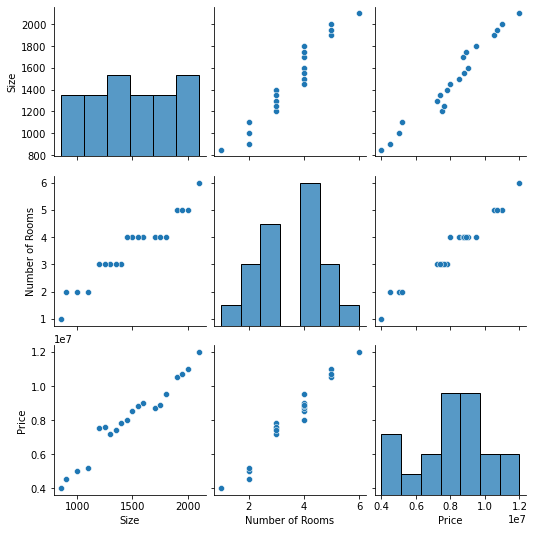

In [87]:
# Analyze distributions
sns.pairplot(df)
plt.show()

Correlation Matrix:
                     Size  Number of Rooms     Price
Size             1.000000         0.963179  0.976440
Number of Rooms  0.963179         1.000000  0.979753
Price            0.976440         0.979753  1.000000


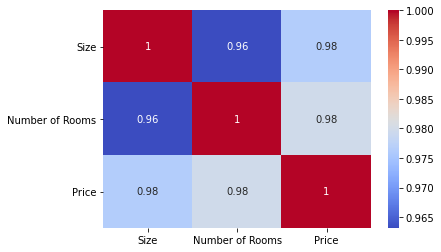

In [88]:
# Correlation Analysis
corr_matrix = df.corr()
print("Correlation Matrix:")
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [89]:
# Remove low-impact predictors (if correlation is very low with Price)
thresh = 0.1
important_features = corr_matrix['Price'].abs().drop('Price') > thresh
selected_features = important_features[important_features].index.tolist()

In [90]:
print(df)

    Size  Location  Number of Rooms     Price
0   1200     Urban                3   7500000
1   1500  Suburban                4   8500000
2   1000     Rural                2   5000000
3   1800     Urban                4   9500000
4   1300  Suburban                3   7200000
5   2000     Urban                5  11000000
6   1100     Rural                2   5200000
7   1700  Suburban                4   8700000
8   1400     Urban                3   7800000
9    900     Rural                2   4500000
10  1600     Urban                4   9000000
11  1250  Suburban                3   7600000
12  1900     Urban                5  10500000
13  1350  Suburban                3   7400000
14  1450     Urban                4   8000000
15  1550  Suburban                4   8800000
16  1950     Urban                5  10700000
17   850     Rural                1   4000000
18  2100     Urban                6  12000000
19  1750  Suburban                4   8900000


In [91]:
# 2. Data Preprocessing
X = df[selected_features + ['Location']]
y = df['Price']

In [92]:
print(X)
print(y)

    Size  Number of Rooms  Location
0   1200                3     Urban
1   1500                4  Suburban
2   1000                2     Rural
3   1800                4     Urban
4   1300                3  Suburban
5   2000                5     Urban
6   1100                2     Rural
7   1700                4  Suburban
8   1400                3     Urban
9    900                2     Rural
10  1600                4     Urban
11  1250                3  Suburban
12  1900                5     Urban
13  1350                3  Suburban
14  1450                4     Urban
15  1550                4  Suburban
16  1950                5     Urban
17   850                1     Rural
18  2100                6     Urban
19  1750                4  Suburban
0      7500000
1      8500000
2      5000000
3      9500000
4      7200000
5     11000000
6      5200000
7      8700000
8      7800000
9      4500000
10     9000000
11     7600000
12    10500000
13     7400000
14     8000000
15     8800000
16  

In [93]:
# Encoding categorical variable 'Location'
if df['Location'].nunique() <= 3:
    encoding_method = OneHotEncoder(drop='first')  # Non-ordinal encoding
else:
    encoding_method = LabelEncoder()  # Ordinal encoding if necessary


In [94]:
preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), selected_features),  # Min-Max Scaling for numerical features
    ('cat', encoding_method, ['Location'])
])

In [95]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# 4. Model Training
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Size', 'Number of Rooms']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Location'])])),
                ('regressor', LinearRegression())])

In [97]:
# 5. Model Evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')


RMSE: 231907.80410409824
R² Score: 0.9852452044981111


In [99]:
# Feature Insights
coefficients = model.named_steps['regressor'].coef_

# For older versions of scikit-learn, use get_feature_names() instead of get_feature_names_out()
feature_names = model.named_steps['preprocessor'].transformers_[0][2] + list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names())
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(feature_importance.sort_values(by='Coefficient', ascending=False))

           Feature   Coefficient
0             Size  3.394179e+06
1  Number of Rooms  2.779626e+06
3         x0_Urban  9.831601e+05
2      x0_Suburban  7.577443e+05
